# Algorithms Exercise 1

## Imports

In [265]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [266]:
matplotlib?

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [267]:
def no_punctuation(x):
    if x=="'" or x=='`'or x=='~'or x=='!'or x=='@'or x=='#'or x=='$'or x=='%'or x=='^'or x=='&'or x=='*'or x=='('or x==')'or x=='_'or x=='-'or x=='+'or x=='='or x=='{'or x=='}'or x=='['or x==']'or x=='|'or x=='\\' or x==':'or x==';'or x=='"'or x=='>'or x=='<'or x==','or x=='.'or x=='?'or x=='/':
        return False
    return True

In [274]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\\'):
    """Split a string into a list of words, removing punctuation and stop words."""
    s=s.replace('--',' ')
    s=s.replace('-',' ')
    s=s.splitlines()         # COLLABORATED WITH HUNTER HERRIN
    y=[]
    for i in s:
        c=i.split()
        y.append(c)
    z=[]
    for j in range(len(y)):
        z=z+y[j]
        b=' '.join(z)

    t=list(filter(no_punctuation,b))
    T=''.join(t)
    if stop_words==None:
        T=T.replace('  ','')
    elif isinstance(stop_words,str)==True:
             stop_words=stop_words.split()
             for i in range(len(stop_words)):
                T=T.replace(' '+stop_words[i]+' ',' ')
                T=T.replace('  ','')
    else:
        for i in range(len(stop_words)):
            T=T.replace(' '+stop_words[i]+' ',' ')
            T=T.replace('  ','')
    T=T.lower()
    return T.split()

    
    

In [275]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [276]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    my_dictionary={}
    for i in data:
        if i not in my_dictionary:
            my_dictionary[i]=1
        else:
            my_dictionary[i] +=1
    return my_dictionary

In [277]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [278]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    x=sorted(wc, key=wc.get, reverse=True)
    y=sorted(wc.values(), reverse=True)
    return list(zip(x,y))
    

        
        

In [279]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [310]:
MOBY=open('mobydick_chapter1.txt')
MOBY=MOBY.read()

MOBY2=MOBY.splitlines()
MOBY3=' '.join(MOBY2)


swc=sort_word_counts(count_words(tokenize(MOBY3,stop_words=['the','of','and','a','to','in','is','it','that','as'])))


len(swc)


848

In [311]:
assert swc[0]==('i',43)
assert len(swc)==848

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

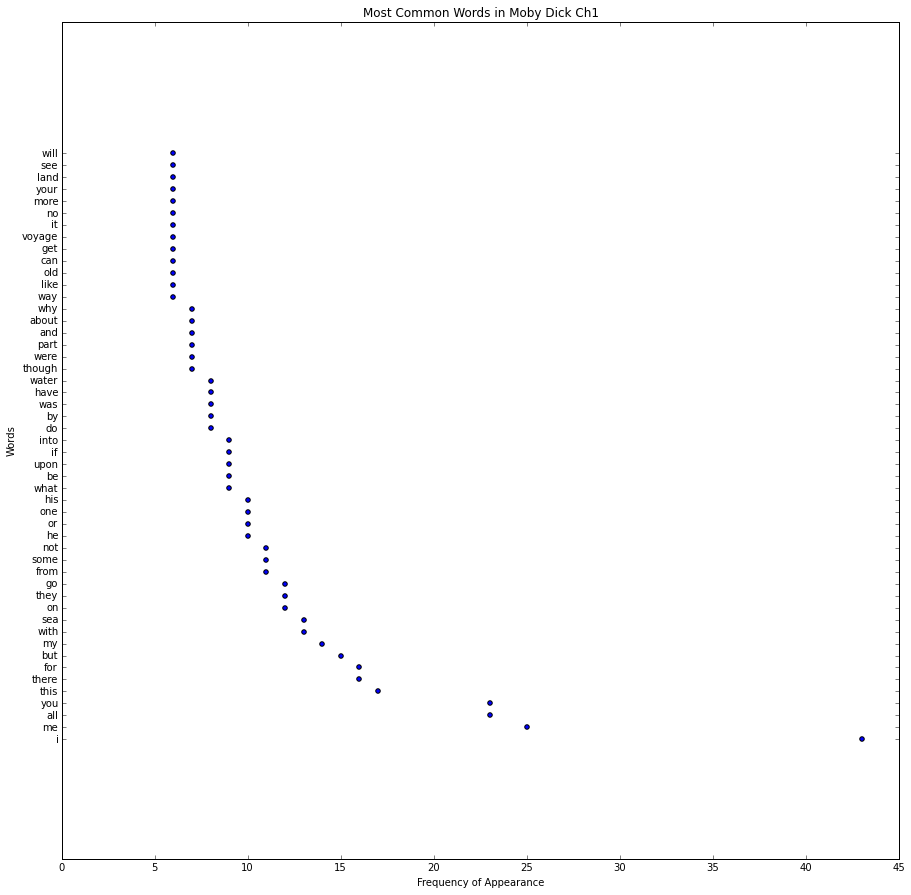

In [312]:
Q=np.array(swc)
W=Q[range(50),0]
E=Q[range(50),1]

plt.figure(figsize=(15,15))
plt.scatter(E, range(50))
plt.yticks(range(50),W)
plt.xlabel('Frequency of Appearance')
plt.ylabel('Words')
plt.title('Most Common Words in Moby Dick Ch1')




In [308]:
assert True # use this for grading the dotplot